In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.covariance import EllipticEnvelope
from limpieza_funciones import grafico_outliers

In [3]:
# Carga de datos.
df = pd.read_csv("outliers.csv")
print(df)

            a         b
0    0.149014 -0.041479
1    0.194307  0.456909
2   -0.070246 -0.070241
3    0.473764  0.230230
4   -0.140842  0.162768
..        ...       ...
195 -5.114441  0.646251
196  5.631630  0.277174
197  1.552784  2.348984
198 -0.545507  1.530697
199  1.011772  4.813896

[200 rows x 2 columns]


In [4]:
# Limpieza de datos: detección de outliers.
outlier_method = EllipticEnvelope().fit(df)
# Obtenemos unos valores de puntuación a nivel de instancia para determinar después las que corresponden con valores atípicos
scores_pred = outlier_method.decision_function(df)
print(scores_pred)

[ 380.37545798  377.68366889  380.67322999  377.13892492  380.26607417
  380.33931444  376.29297392  377.32904362  379.63994743  377.6930974
  377.98909984  378.321857    380.50682797  379.26614435  380.35346999
  376.5149875   379.42138826  377.99659246  376.10955984  378.91419319
  380.01861834  380.65486648  377.9561113   379.33613785  376.84348541
  380.39636833  379.9267021   378.527039    379.99280574  379.57952309
  380.54163284  377.93494531  377.93635745  379.66853492  380.02788782
  377.97185066  378.03930747  372.44923957  380.62607404  376.05787502
  380.61873638  377.64261633  379.86599469  379.5892115   380.23942991
  379.72765989  380.1953452   378.14690002  380.5674927   380.69311954
  378.52820103  379.92384623  380.59750738  376.41440621  380.64259932
  376.8750946   373.91551476  380.66784361  379.13413535  378.56145764
  378.86636634  375.7952078   374.98331287  379.45023138  380.41808203
  378.2626769   379.38030204  377.15748329  380.07687395  377.98617477
  378.8

limite inferior:  328.658000047178
limite superior:  410.74251294319276


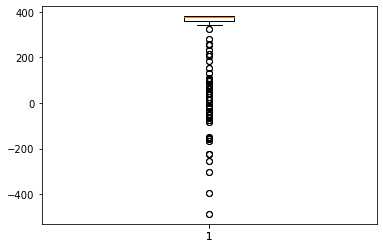

In [5]:
# Seleccionamos manualmente los umbrales a partir de los cuales vamos a determinar qué valores son outliers y cuáles no. 
Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC #xmin
ls = Q3 + 1.5*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

import matplotlib.pyplot as plt
prop = plt.boxplot(scores_pred)
plt.boxplot(scores_pred)
plt.show()

In [6]:
# Estimación de outliers. Encontramos la posición de los outliers dentro de nuestros conjunto de datos
pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)
print('Posición de outliers en el extremo inferior: ', pos_i[0])
print('Posición de outliers en el extremo superior: ', pos_s[0])

Posición de outliers en el extremo inferior:  [150 151 152 153 154 155 156 157 158 159 160 161 162 163 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 199]
Posición de outliers en el extremo superior:  []


In [7]:
# Matriz de outliers. Observamos que los outliers son aquellas instancias donde el valor es 1
mask_outliers = np.zeros(np.shape(scores_pred))
mask_outliers[pos_i] = 1
mask_outliers[pos_s] = 1
print(mask_outliers)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1.]


In [8]:
# Contamos el número de datos reales y de outliers que hemos detectado
valores, ocurrencias = np.unique(mask_outliers, return_counts=True)
print(valores, ocurrencias)
print('Número de instancias normales: ', ocurrencias[0])
print('Número de instancias atípicas: ', ocurrencias[1])

[0. 1.] [152  48]
Número de instancias normales:  152
Número de instancias atípicas:  48


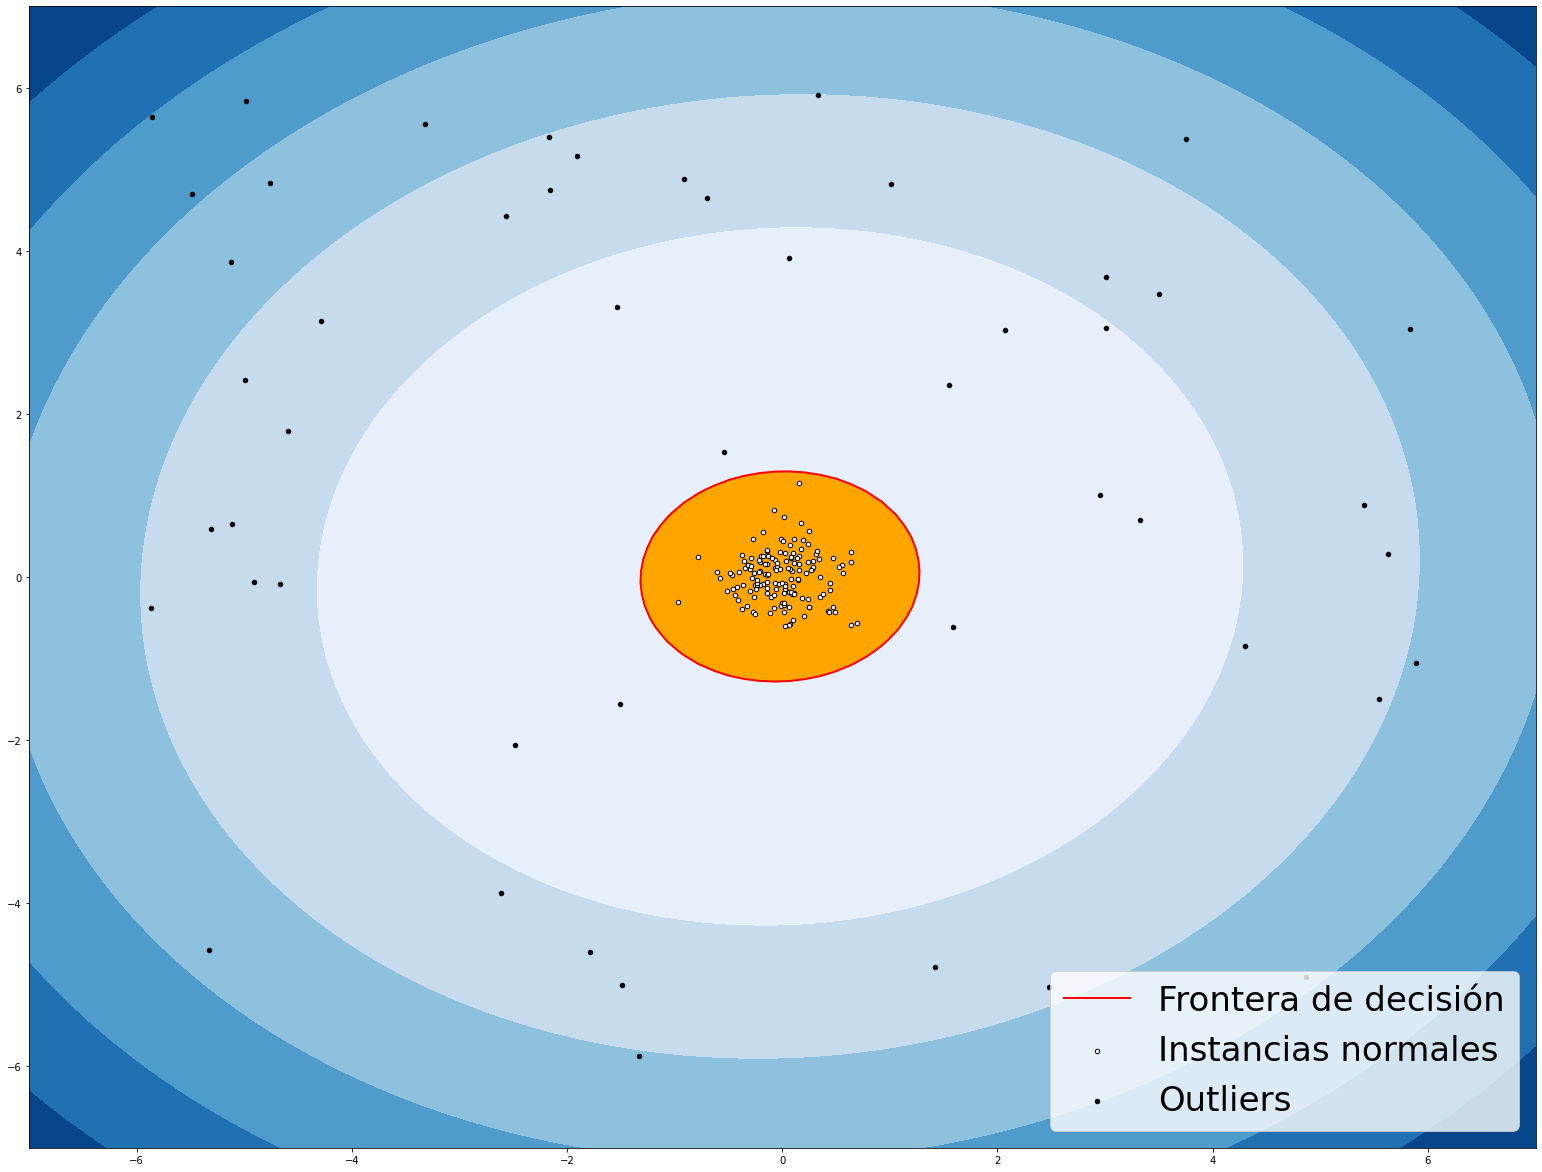

In [9]:
# Dibujamos la gráfica de outliers.
threshold = stats.scoreatpercentile(scores_pred, 25) # Fijamos un umbral específico
grafico_outliers(df, outlier_method, 150, threshold, -7, 7)

In [10]:
# Detección de outliers en base a la estandarización
X_test = np.array([[ 1., -1.,  2.],
                    [ 50.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_test_std = standardizer.transform(X_test)
print(X_test_std)

NameError: name 'standardizer' is not defined